In [2]:
import pandas as pd
df = pd.read_csv('raw_data/AAAU.csv', index_col = 'Date', parse_dates=True)
df.tail(5).shape[0]
df.loc[:"2021-01-06"]
period = df.loc["2021-01-06":]
period




,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-06,19.270000,19.270000,18.930000,19.100000,19.100000,1425400
2021-01-07,19.070000,19.100000,18.990000,19.049999,19.049999,330200
2021-01-08,18.780001,18.780001,18.219999,18.410000,18.410000,1217300
2021-01-11,18.270000,18.440001,18.270000,18.379999,18.379999,441700
2021-01-12,18.389999,18.490000,18.299999,18.490000,18.490000,497800
...,...,...,...,...,...,...
2021-12-22,17.840000,17.940001,17.790001,17.930000,17.930000,57200
2021-12-23,17.940001,18.000000,17.889999,17.990000,17.990000,101400
2021-12-27,17.980000,18.030001,17.950001,18.010000,18.010000,200400


In [14]:
df.loc[df.index == "2021-01-06"].index
df.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,18.889999,18.940001,18.830000,18.940001,18.940001,282500
2021-01-04,19.330000,19.360001,19.219999,19.350000,19.350000,767800
2021-01-05,19.420000,19.440001,19.309999,19.410000,19.410000,607000
2021-01-06,19.270000,19.270000,18.930000,19.100000,19.100000,1425400
2021-01-07,19.070000,19.100000,18.990000,19.049999,19.049999,330200
2021-01-08,18.780001,18.780001,18.219999,18.410000,18.410000,1217300
2021-01-11,18.270000,18.440001,18.270000,18.379999,18.379999,441700
2021-01-12,18.389999,18.490000,18.299999,18.490000,18.490000,497800
2021-01-13,18.450001,18.520000,18.389999,18.400000,18.400000,665100


In [21]:
import numpy as np
df['long_MA'] = df['Close'].rolling(int(20)).mean()
df['short_MA'] = df['Close'].rolling(int(5)).mean()
df['crosszero'] = np.where(df['short_MA'] > df['long_MA'], 1.0, 0.0)
df['position'] = df['crosszero'].diff()
df.tail(50)
exits = df["position"].isin([-2.0]).any().any()
exits


False

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


df = pd.read_csv('raw_data/AAAU.csv', index_col = 'Date', parse_dates=True)
df = df["Close"]
df2 =  df[:-5]



Date
2020-12-31    18.940001
2021-01-04    19.350000
2021-01-05    19.410000
2021-01-06    19.100000
2021-01-07    19.049999
                ...    
2021-12-15    17.680000
2021-12-16    17.889999
2021-12-17    17.860001
2021-12-20    17.790001
2021-12-21    17.770000
Name: Close, Length: 246, dtype: float64

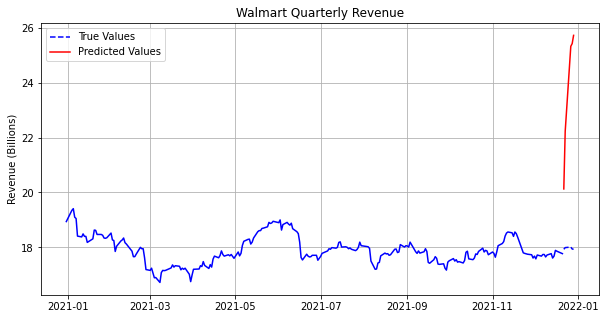

In [43]:

x = [dt.datetime.date(d) for d in df.index]
font = {'size'   : 15}
predictions_change = [2.2, 2.1, 3.1, 0.1, 0.3]
predictions_price = []

for ind, change in enumerate(predictions_change):
    if ind == 0: 
        predictions_price.append(df[-len(predictions)]+change )
    else:
        predictions_price.append(predictions_price[ind-1]+change)

fig = plt.figure(figsize=(10,5))
plt.title('Walmart Quarterly Revenue')
plt.ylabel('Revenue (Billions)')
plt.grid(True)
plt.plot(x[:-len(predictions_price)],
         df[:-len(predictions_price)],
         "b-")
plt.plot(x[-len(predictions_price):],
         df[-len(predictions_price):],
         "b--",
         label='True Values')
plt.plot(x[-len(predictions_price):],
         predictions_price,
         "r-",
         label='Predicted Values')
plt.legend()
plt.savefig('predicted_price', dpi=600)
